フィルターによる輝度値の分布の変化を可視化します。まず，訓練データを読み込んで各フィルターにかけます。

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import filter
import numpy as np
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np


    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_mnist('', kind='train')

sub_pixels = np.zeros((60000, 784), dtype = np.uint8)
up_pixels = np.zeros((60000, 784), dtype = np.uint8)
average_pixels = np.zeros((60000, 784), dtype = np.uint8)
peath_pixels = np.zeros((60000, 784), dtype = np.uint8)

for i in range(0,10):
    for raw in range(i*6000, (i+1)*6000):
        pixel_raw = filter.Filter(X_train[raw, :].reshape(28, 28))
        sub_pixels[raw, :] = pixel_raw.sub().reshape(-1,)
        up_pixels [raw, :] = pixel_raw.up().reshape(-1,)
        average_pixels[raw, :] = pixel_raw.average().reshape(-1,)
        peath_pixels[raw, :] = pixel_raw.peath().reshape(-1,)


C:\Users\dddes\filter.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  data_filtered[raw, column] = self.data[raw, column] - self.data[raw, column - 1]
C:\Users\dddes\filter.py:38: RuntimeWarning: overflow encountered in ubyte_scalars
  data_filtered[raw, column] = self.data[raw, column] - self.data[raw - 1, column]
C:\Users\dddes\filter.py:60: RuntimeWarning: overflow encountered in ubyte_scalars
  data_filtered[raw, column] = self.data[raw, column] - ((self.data[raw, column-1] + self.data[raw - 1, column]) // 2)
C:\Users\dddes\filter.py:89: RuntimeWarning: overflow encountered in ubyte_scalars
  horizon = abs(above - diagonal)
C:\Users\dddes\filter.py:91: RuntimeWarning: overflow encountered in ubyte_scalars
  sum = abs(above - diagonal + left - diagonal)
C:\Users\dddes\filter.py:108: RuntimeWarning: overflow encountered in ubyte_scalars
  data_filtered[raw, column] = self.data[raw, column] - self.peath
C:\Users\dddes\filter.py:90: RuntimeWarning: overflow encountered i

次にグラフを表示していきます。元の分布，sub,up,average,peathの順に表示します。

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


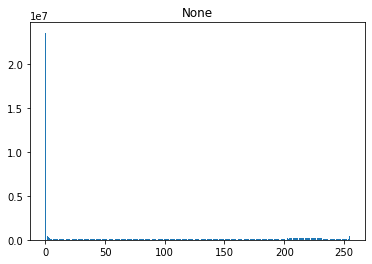

In [2]:
plt.hist(np.ravel(X_train), bins=255, rwidth=0.8, range=(0, 255))
plt.title("None")
plt.show()

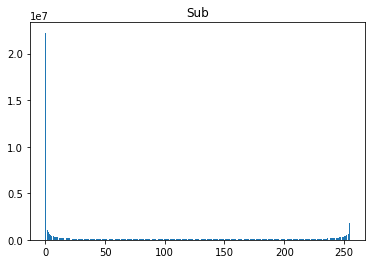

In [3]:
plt.hist(np.ravel(sub_pixels), bins=255, rwidth=0.8, range=(0, 255))
plt.title("Sub")
plt.show()

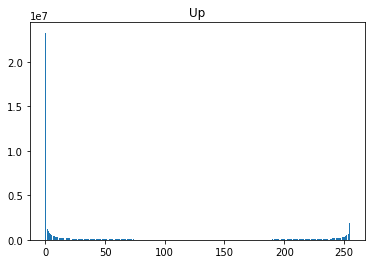

In [4]:
plt.hist(np.ravel(up_pixels), bins=255, rwidth=0.8, range=(0, 255))
plt.title("Up")
plt.show()

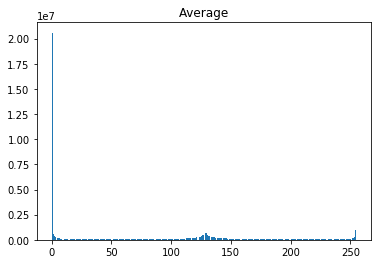

In [5]:
plt.hist(np.ravel(average_pixels), bins=255, rwidth=0.8, range=(0, 255))
plt.title("Average")
plt.show()

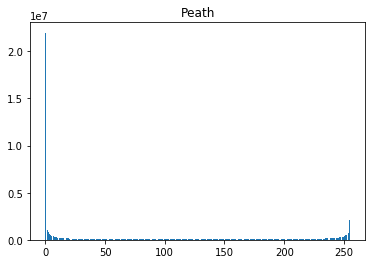

In [7]:
plt.hist(np.ravel(peath_pixels), bins=255, rwidth=0.8, range=(0, 255))
plt.title("Peath")
plt.show()